<a href="https://colab.research.google.com/github/Harhsa/Harhsa/blob/main/Project_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Superstore sales**

#Understand the Dataset

In [23]:
import pandas as pd

# Load the dataset
df = pd.read_csv('train.csv')
print(df.head())


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

#Data Cleaning

In [24]:
# Check for missing values
print(df.isnull().sum())
# Drop or fill missing values as necessary
df.dropna(inplace=True)  # Example of dropping missing values


Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


#Data Types

In [25]:
# Check data types
print(df.dtypes)


Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object


#Descriptive Statistics

In [26]:
# Descriptive statistics
print(df.describe())


            Row ID   Postal Code         Sales
count  9789.000000   9789.000000   9789.000000
mean   4896.705588  55273.322403    230.116193
std    2827.486899  32041.223413    625.302079
min       1.000000   1040.000000      0.444000
25%    2449.000000  23223.000000     17.248000
50%    4896.000000  58103.000000     54.384000
75%    7344.000000  90008.000000    210.392000
max    9800.000000  99301.000000  22638.480000


#Histograms

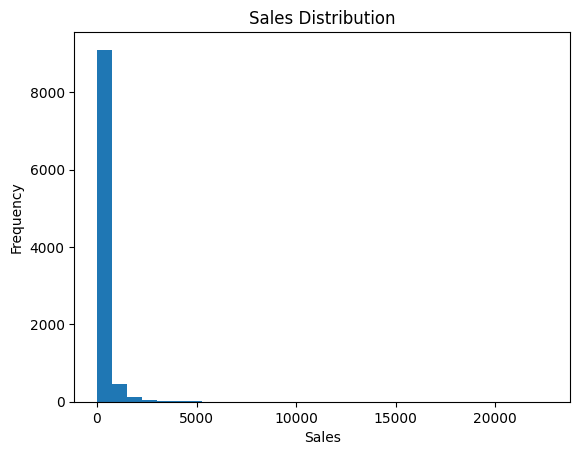

In [27]:
import matplotlib.pyplot as plt

# Sales histogram
plt.hist(df['Sales'], bins=30)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


#Time Series Plots

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')


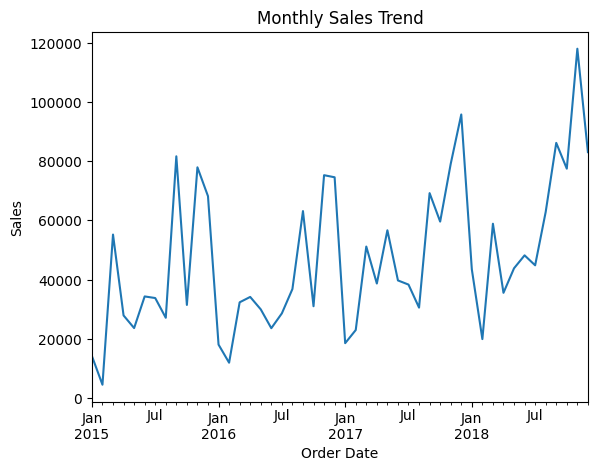

In [35]:

# Load the dataset
df = pd.read_csv('train.csv')

# Check the column names to find the exact name of the date column
print(df.columns)

# Convert 'Order Date' to datetime with dayfirst parameter
# Replace 'Order Date' with the correct column name if needed
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Set 'Order Date' as the index
df.set_index('Order Date', inplace=True)

# Resample and plot
df['Sales'].resample('M').sum().plot()
plt.title('Monthly Sales Trend')
plt.ylabel('Sales')
plt.show()


#Seasonal Decomposition

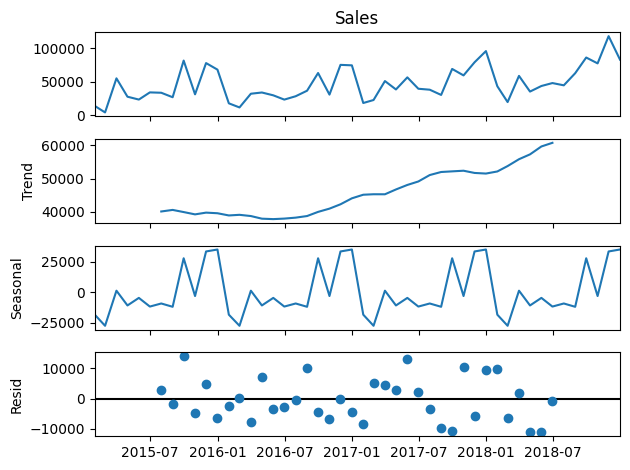

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Sales'].resample('M').sum(), model='additive')
result.plot()
plt.show()


#Box Plots


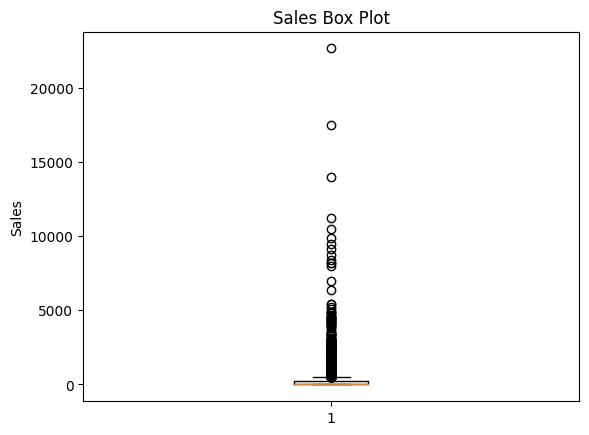

In [37]:
plt.boxplot(df['Sales'])
plt.title('Sales Box Plot')
plt.ylabel('Sales')
plt.show()



#Sales Distribution by Category

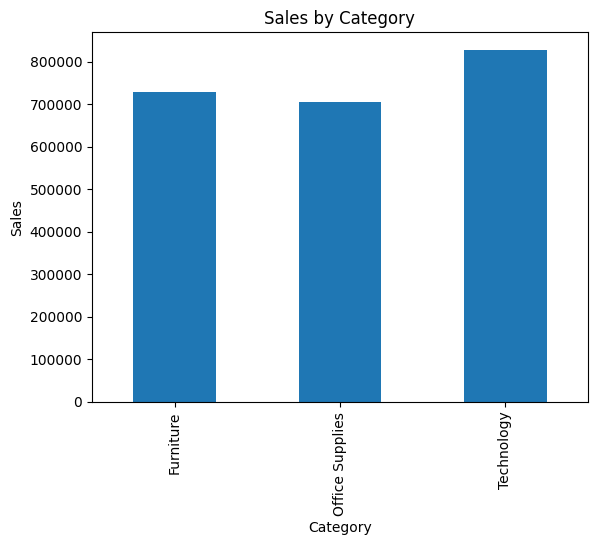

In [38]:
category_sales = df.groupby('Category')['Sales'].sum()
category_sales.plot(kind='bar')
plt.title('Sales by Category')
plt.ylabel('Sales')
plt.show()


#Correlation Analysis

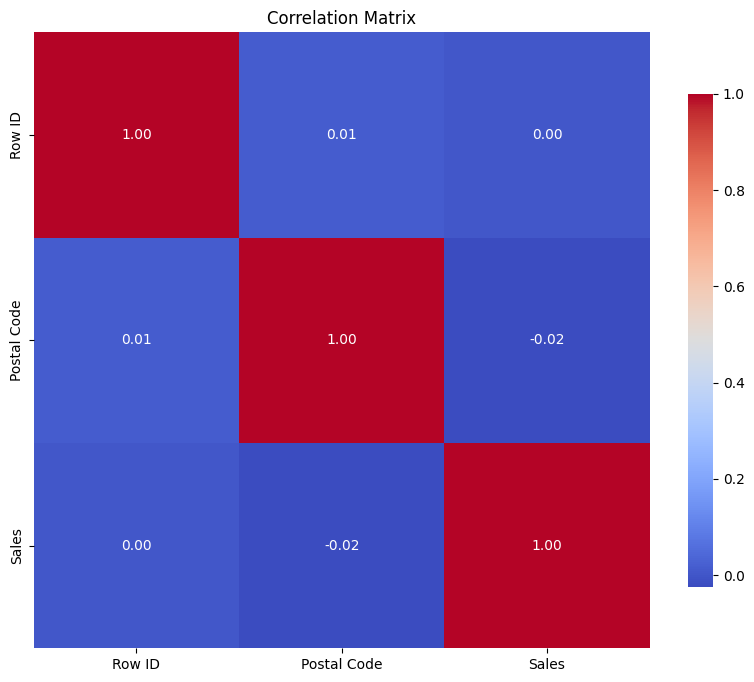

In [44]:


# Option 1: Drop non-numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Option 2: Convert specific columns to numeric (if applicable)
# df['YourColumn'] = pd.to_numeric(df['YourColumn'], errors='coerce')

# Calculate the correlation matrix
correlation = df_numeric.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix')

# Create a heatmap
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Show the plot
plt.show()


# **Indian cars**

#Understand Dataset: Load the dataset and check its structure.

In [45]:
import pandas as pd

# Load the dataset
df = pd.read_csv('cars_ds_final.csv')
print("Shape of the dataset:", df.shape)  # Number of rows and columns
print("Column names:", df.columns)  # Column names
df.head()  # View the first few rows
df.tail()  # View the last few rows
df.info()  # Summary of the DataFrame


Shape of the dataset: (1276, 141)
Column names: Index(['Unnamed: 0', 'Make', 'Model', 'Variant', 'Ex-Showroom_Price',
       'Displacement', 'Cylinders', 'Valves_Per_Cylinder', 'Drivetrain',
       'Cylinder_Configuration',
       ...
       'Leather_Wrapped_Steering', 'Automatic_Headlamps', 'Engine_Type',
       'ASR_/_Traction_Control', 'Cruise_Control', 'USB_Ports',
       'Heads-Up_Display', 'Welcome_Lights', 'Battery', 'Electric_Range'],
      dtype='object', length=141)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Columns: 141 entries, Unnamed: 0 to Electric_Range
dtypes: float64(6), int64(1), object(134)
memory usage: 1.4+ MB


#Data Cleaning: Handle any missing values.

Missing values in each column:
Unnamed: 0              0
Make                   75
Model                   0
Variant                 0
Ex-Showroom_Price       0
                     ... 
USB_Ports            1247
Heads-Up_Display     1225
Welcome_Lights       1207
Battery              1263
Electric_Range       1259
Length: 141, dtype: int64


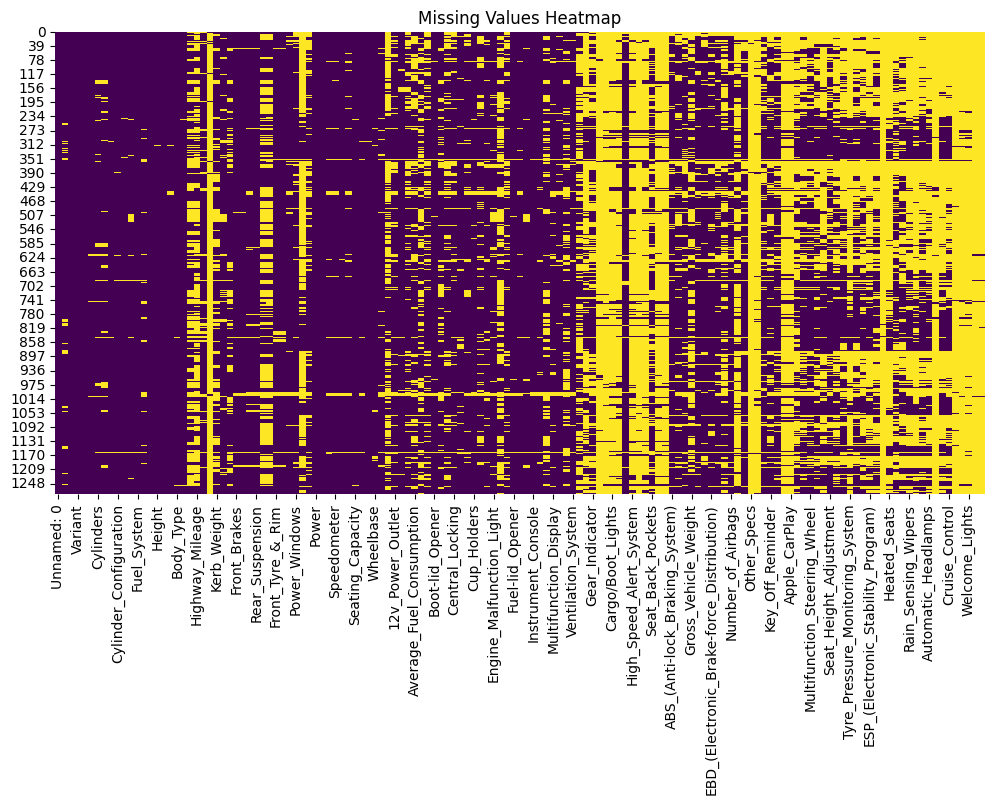

Total duplicates: 0


In [46]:
print("Missing values in each column:")
print(df.isnull().sum())  # Check for missing values

# Visualize missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Drop rows with missing values
df.dropna(inplace=True)

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Total duplicates: {duplicates}")


#Data Types: Ensure the data types are appropriate.

In [47]:
print("Data types of each column:")
print(df.dtypes)  # Check data types


Data types of each column:
Unnamed: 0             int64
Make                  object
Model                 object
Variant               object
Ex-Showroom_Price     object
                      ...   
USB_Ports            float64
Heads-Up_Display      object
Welcome_Lights        object
Battery               object
Electric_Range        object
Length: 141, dtype: object


#Data Cleaning: Convert relevant columns to numeric types

In [48]:
# Clean the Ex-Showroom_Price column
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].replace({'Rs. ': '', ',': ''}, regex=True).astype(float)


# Descriptive Statistics: Calculate basic statistics.

In [49]:
print("Descriptive statistics for numeric columns:")
print(df.describe())  # Summary statistics for numeric columns


Descriptive statistics for numeric columns:
       Unnamed: 0  Ex-Showroom_Price  Cylinders  Valves_Per_Cylinder  Doors  \
count         0.0                0.0        0.0                  0.0    0.0   
mean          NaN                NaN        NaN                  NaN    NaN   
std           NaN                NaN        NaN                  NaN    NaN   
min           NaN                NaN        NaN                  NaN    NaN   
25%           NaN                NaN        NaN                  NaN    NaN   
50%           NaN                NaN        NaN                  NaN    NaN   
75%           NaN                NaN        NaN                  NaN    NaN   
max           NaN                NaN        NaN                  NaN    NaN   

       Seating_Capacity  Number_of_Airbags  USB_Ports  
count               0.0                0.0        0.0  
mean                NaN                NaN        NaN  
std                 NaN                NaN        NaN  
min                 

#Histograms: Visualize distributions of key numeric variables.

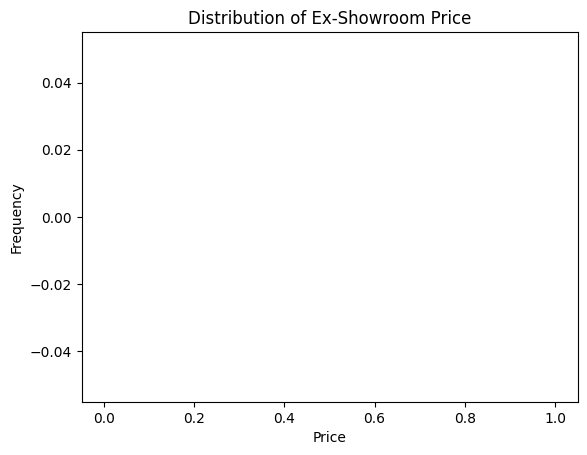

In [50]:
plt.hist(df['Ex-Showroom_Price'], bins=30)
plt.title('Distribution of Ex-Showroom Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


#Bar Charts: Represent counts of categorical variables.

In [53]:
print(df.columns)  # Check all column names


Index(['Unnamed: 0', 'Make', 'Model', 'Variant', 'Ex-Showroom_Price',
       'Displacement', 'Cylinders', 'Valves_Per_Cylinder', 'Drivetrain',
       'Cylinder_Configuration',
       ...
       'Leather_Wrapped_Steering', 'Automatic_Headlamps', 'Engine_Type',
       'ASR_/_Traction_Control', 'Cruise_Control', 'USB_Ports',
       'Heads-Up_Display', 'Welcome_Lights', 'Battery', 'Electric_Range'],
      dtype='object', length=141)


In [54]:
print(df['Make'].isnull().sum())  # Check for missing values in the 'Make' column
print(df['Make'].value_counts())   # Check the counts of each category in 'Make'


0
Series([], Name: count, dtype: int64)


In [55]:
print(df.head())  # View the first few rows of the DataFrame


Empty DataFrame
Columns: [Unnamed: 0, Make, Model, Variant, Ex-Showroom_Price, Displacement, Cylinders, Valves_Per_Cylinder, Drivetrain, Cylinder_Configuration, Emission_Norm, Engine_Location, Fuel_System, Fuel_Tank_Capacity, Fuel_Type, Height, Length, Width, Body_Type, Doors, City_Mileage, Highway_Mileage, ARAI_Certified_Mileage, ARAI_Certified_Mileage_for_CNG, Kerb_Weight, Gears, Ground_Clearance, Front_Brakes, Rear_Brakes, Front_Suspension, Rear_Suspension, Front_Track, Rear_Track, Front_Tyre_&_Rim, Rear_Tyre_&_Rim, Power_Steering, Power_Windows, Power_Seats, Keyless_Entry, Power, Torque, Odometer, Speedometer, Tachometer, Tripmeter, Seating_Capacity, Seats_Material, Type, Wheelbase, Wheels_Size, Start_/_Stop_Button, 12v_Power_Outlet, Audiosystem, Aux-in_Compatibility, Average_Fuel_Consumption, Basic_Warranty, Bluetooth, Boot-lid_Opener, Boot_Space, CD_/_MP3_/_DVD_Player, Central_Locking, Child_Safety_Locks, Clock, Cup_Holders, Distance_to_Empty, Door_Pockets, Engine_Malfunction_Lig

In [56]:
# Check if 'Make' column exists and is not empty
if 'Make' in df.columns and not df['Make'].isnull().all():
    make_counts = df['Make'].value_counts()

    if not make_counts.empty:
        make_counts.plot(kind='bar')
        plt.title('Count of Cars by Make')
        plt.xlabel('Make')
        plt.ylabel('Count')
        plt.show()
    else:
        print("No data available for 'Make'.")
else:
    print("'Make' column is missing or empty.")


'Make' column is missing or empty.


In [57]:
import pandas as pd

# Load the dataset
df = pd.read_csv('cars_ds_final.csv')

# Check the DataFrame structure
print(df.head())  # Display the first few rows
print(df.columns)  # Display the column names


   Unnamed: 0  Make      Model  Variant Ex-Showroom_Price Displacement  \
0           0  Tata  Nano Genx       Xt      Rs. 2,92,667       624 cc   
1           1  Tata  Nano Genx       Xe      Rs. 2,36,447       624 cc   
2           2  Tata  Nano Genx  Emax Xm      Rs. 2,96,661       624 cc   
3           3  Tata  Nano Genx      Xta      Rs. 3,34,768       624 cc   
4           4  Tata  Nano Genx       Xm      Rs. 2,72,223       624 cc   

   Cylinders  Valves_Per_Cylinder              Drivetrain  \
0        2.0                  2.0  RWD (Rear Wheel Drive)   
1        2.0                  2.0  RWD (Rear Wheel Drive)   
2        2.0                  2.0  RWD (Rear Wheel Drive)   
3        2.0                  2.0  RWD (Rear Wheel Drive)   
4        2.0                  2.0  RWD (Rear Wheel Drive)   

  Cylinder_Configuration  ... Leather_Wrapped_Steering Automatic_Headlamps  \
0                In-line  ...                      NaN                 NaN   
1                In-line  ...   

In [59]:
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces from column names


In [60]:
import pandas as pd

# Load the dataset
df = pd.read_csv('cars_ds_final.csv')

# Display the first few rows and column names
print("First few rows of the dataset:")
print(df.head())
print("\nColumn names:")
print(df.columns)

# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Check again for the 'Make' column
if 'Make' in df.columns:
    print(f"'Make' column is present with {df['Make'].isnull().sum()} missing values.")
else:
    print("'Make' column is missing.")


First few rows of the dataset:
   Unnamed: 0  Make      Model  Variant Ex-Showroom_Price Displacement  \
0           0  Tata  Nano Genx       Xt      Rs. 2,92,667       624 cc   
1           1  Tata  Nano Genx       Xe      Rs. 2,36,447       624 cc   
2           2  Tata  Nano Genx  Emax Xm      Rs. 2,96,661       624 cc   
3           3  Tata  Nano Genx      Xta      Rs. 3,34,768       624 cc   
4           4  Tata  Nano Genx       Xm      Rs. 2,72,223       624 cc   

   Cylinders  Valves_Per_Cylinder              Drivetrain  \
0        2.0                  2.0  RWD (Rear Wheel Drive)   
1        2.0                  2.0  RWD (Rear Wheel Drive)   
2        2.0                  2.0  RWD (Rear Wheel Drive)   
3        2.0                  2.0  RWD (Rear Wheel Drive)   
4        2.0                  2.0  RWD (Rear Wheel Drive)   

  Cylinder_Configuration  ... Leather_Wrapped_Steering Automatic_Headlamps  \
0                In-line  ...                      NaN                 NaN   
1

'Make' column has 75 missing values.


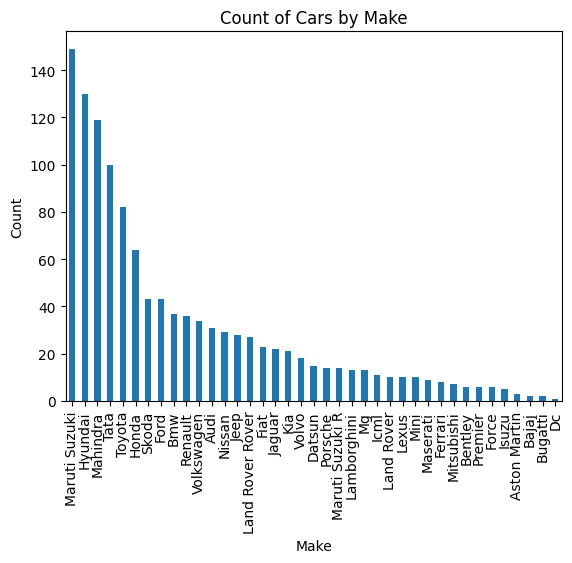

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('cars_ds_final.csv')

# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Check for missing values in the 'Make' column
print(f"'Make' column has {df['Make'].isnull().sum()} missing values.")

# Option 1: Drop rows with missing 'Make'
df_cleaned = df.dropna(subset=['Make'])

# Option 2: Fill missing 'Make' values with 'Unknown'
# df['Make'].fillna('Unknown', inplace=True)

# Now plot the bar chart
make_counts = df_cleaned['Make'].value_counts()

if not make_counts.empty:
    make_counts.plot(kind='bar')
    plt.title('Count of Cars by Make')
    plt.xlabel('Make')
    plt.ylabel('Count')
    plt.show()
else:
    print("No data available for 'Make' after cleaning.")


#Box Plots: Identify outliers.

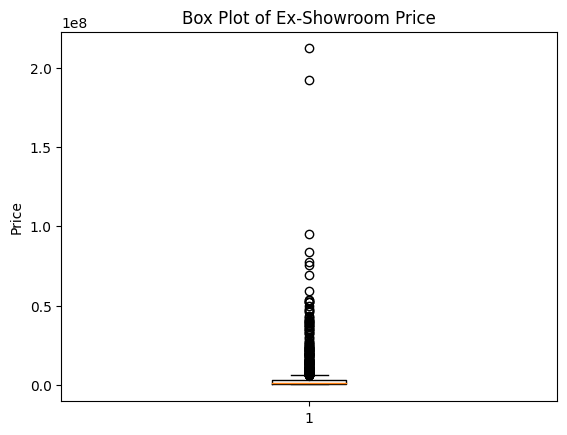

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('cars_ds_final.csv')

# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Clean the 'Ex-Showroom_Price' column
# Remove 'Rs.' and commas, then convert to numeric
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace('Rs. ', '', regex=False)
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace(',', '', regex=False)

# Convert to numeric, forcing errors to NaN
df['Ex-Showroom_Price'] = pd.to_numeric(df['Ex-Showroom_Price'], errors='coerce')

# Drop rows with NaN values in 'Ex-Showroom_Price'
df_cleaned = df.dropna(subset=['Ex-Showroom_Price'])

# Create the box plot
plt.boxplot(df_cleaned['Ex-Showroom_Price'])
plt.title('Box Plot of Ex-Showroom Price')
plt.ylabel('Price')
plt.show()


#Pie Charts: Show contributions of different car models

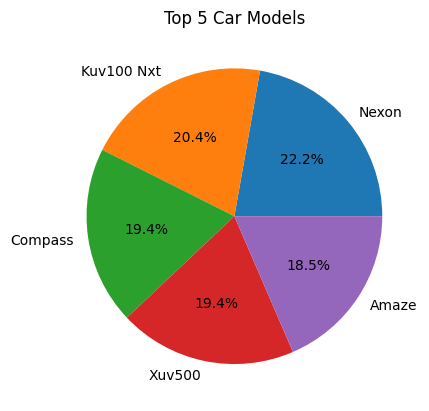

In [64]:
df['Model'].value_counts().head(5).plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 5 Car Models')
plt.ylabel('')
plt.show()


#Count Plots: Visualize counts of observations for categorical variables

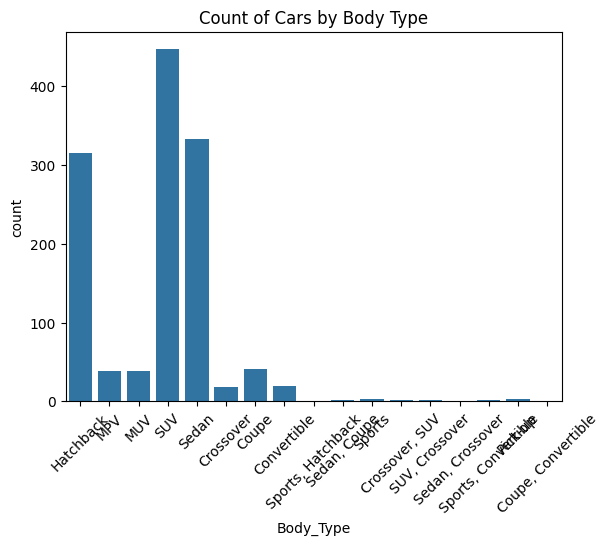

In [65]:
sns.countplot(data=df, x='Body_Type')
plt.title('Count of Cars by Body Type')
plt.xticks(rotation=45)
plt.show()


##**Bivariate Analysis**

#Correlation Matrix: Understand relationships between numeric variables.

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


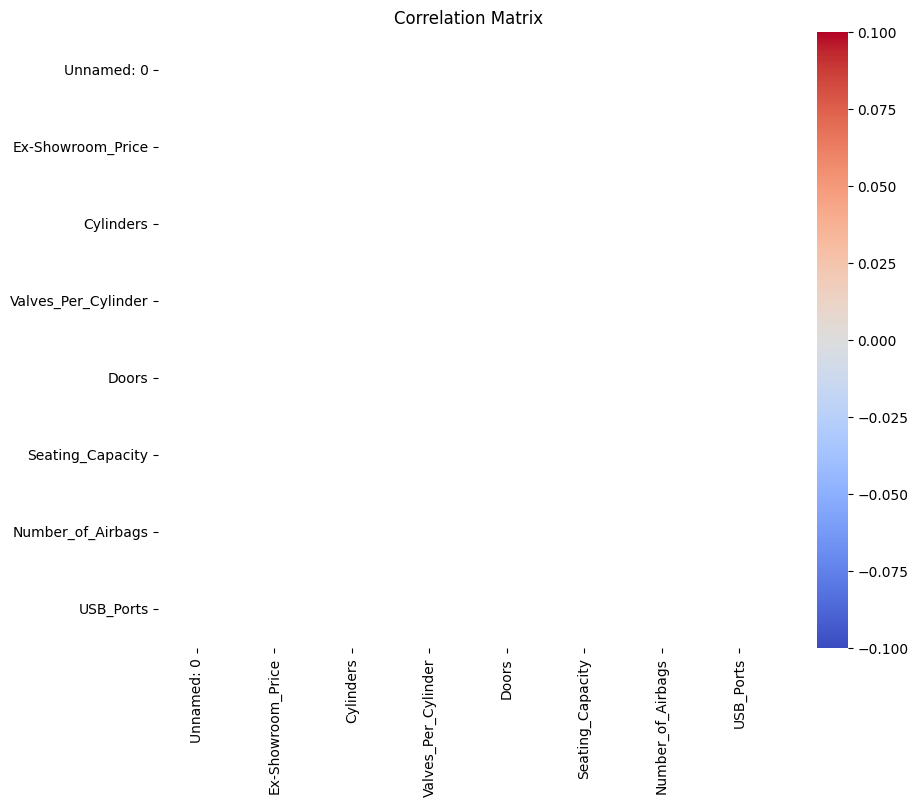

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean the dataset
df = pd.read_csv('cars_ds_final.csv')
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace('Rs. ', '').str.replace(',', '')
df['Ex-Showroom_Price'] = pd.to_numeric(df['Ex-Showroom_Price'], errors='coerce')

# Drop rows with NaN values and select only numeric columns
numeric_df = df.dropna().select_dtypes(include='number')

# Calculate and plot the correlation matrix
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#Scatter Plots: Explore relationships between two numeric variables.

python


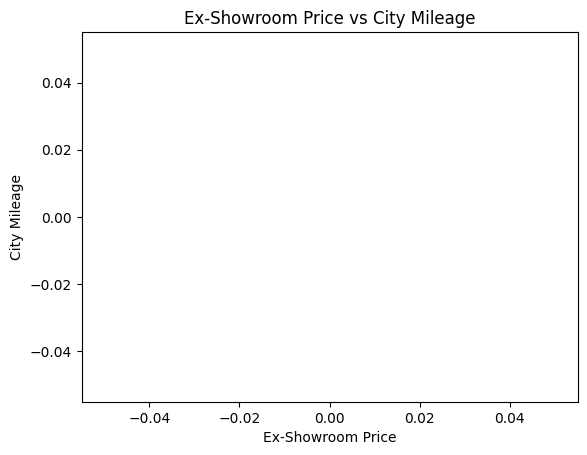

In [74]:

# Create the scatter plot
plt.scatter(df_cleaned['Ex-Showroom_Price'], df_cleaned['City_Mileage'])
plt.title('Ex-Showroom Price vs City Mileage')
plt.xlabel('Ex-Showroom Price')
plt.ylabel('City Mileage')
plt.show()


#Pair Plots: Quick overview of relationships between multiple numeric variables.

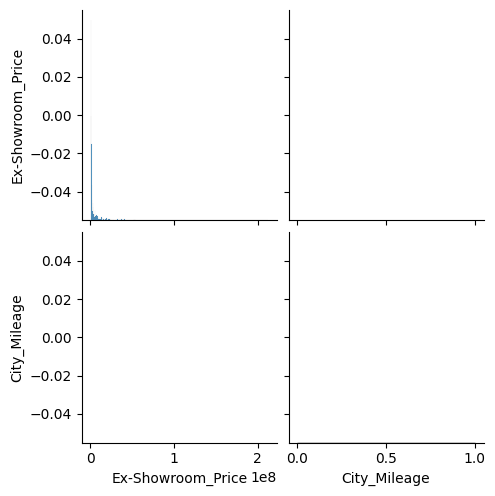

In [75]:
sns.pairplot(df[['Ex-Showroom_Price', 'City_Mileage', 'Highway_Mileage']])
plt.show()


#Bar Charts with Hue: Enhance bar charts with additional categorical variables.

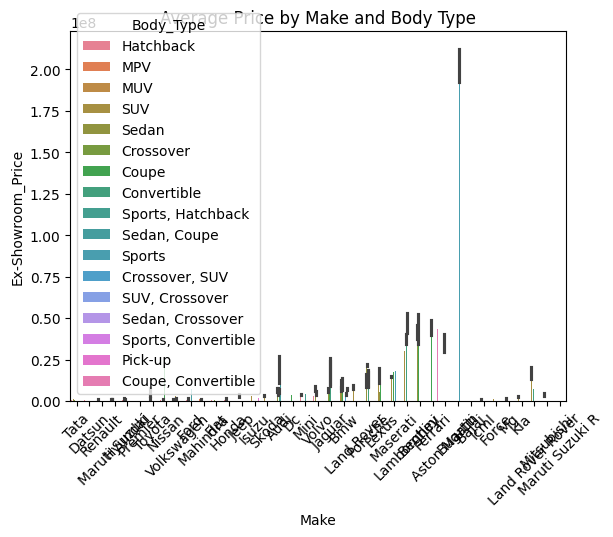

In [76]:
sns.barplot(data=df, x='Make', y='Ex-Showroom_Price', hue='Body_Type')
plt.title('Average Price by Make and Body Type')
plt.xticks(rotation=45)
plt.show()


#Joint Plots: Display distributions of two numeric variables.

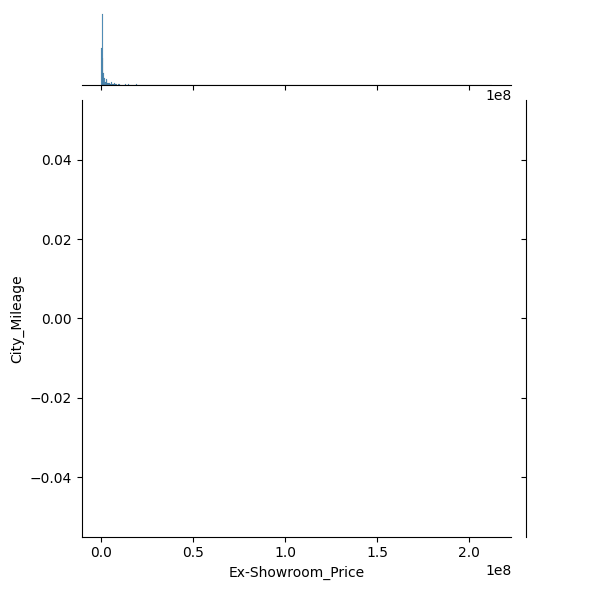

In [77]:
sns.jointplot(x='Ex-Showroom_Price', y='City_Mileage', data=df)
plt.show()


#Box Plots with Hue: Enhance box plots with additional categorical variables.

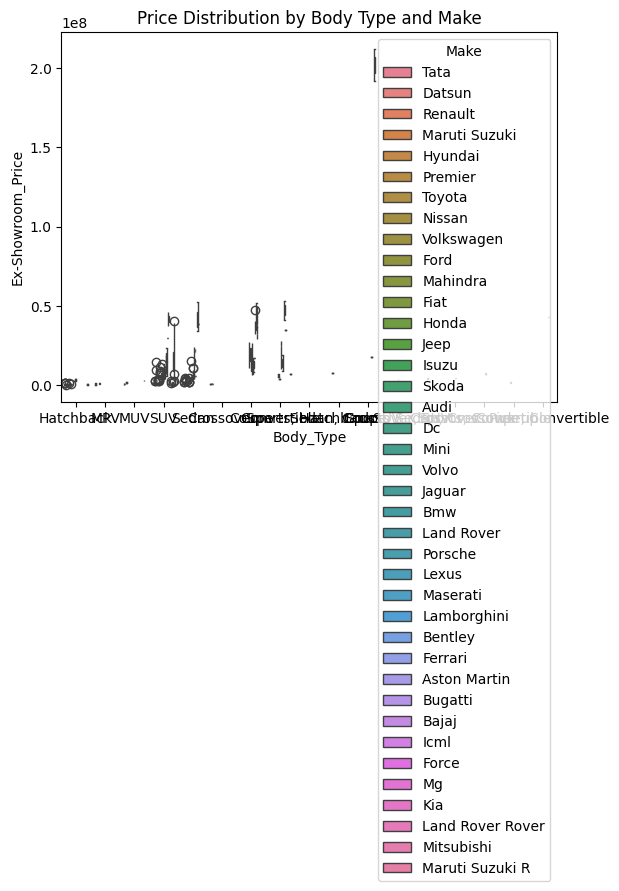

In [78]:
sns.boxplot(data=df, x='Body_Type', y='Ex-Showroom_Price', hue='Make')
plt.title('Price Distribution by Body Type and Make')
plt.show()


#Categorical Plots: Explore relationships between categorical and numeric variables.

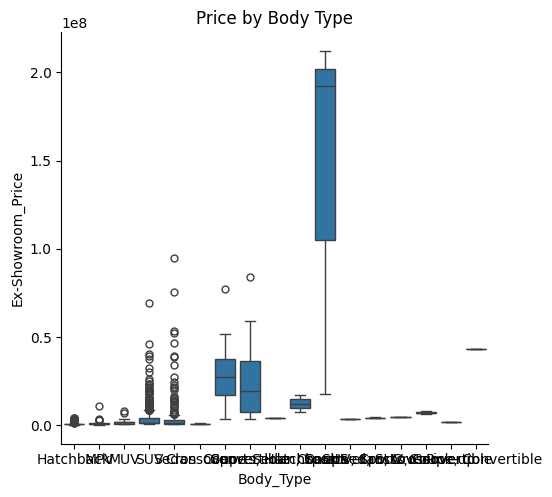

In [79]:
sns.catplot(data=df, x='Body_Type', y='Ex-Showroom_Price', kind='box')
plt.title('Price by Body Type')
plt.show()


#Violin Plots: Visualize distributions across different categories.

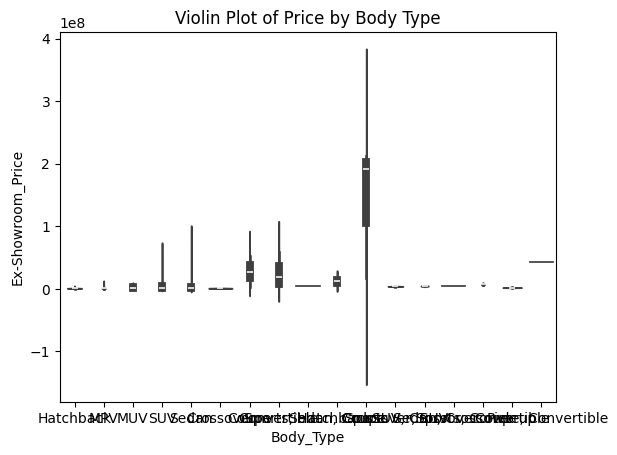

In [80]:
sns.violinplot(data=df, x='Body_Type', y='Ex-Showroom_Price')
plt.title('Violin Plot of Price by Body Type')
plt.show()


# Stacked Bar Charts: Represent combined contributions of different categories.

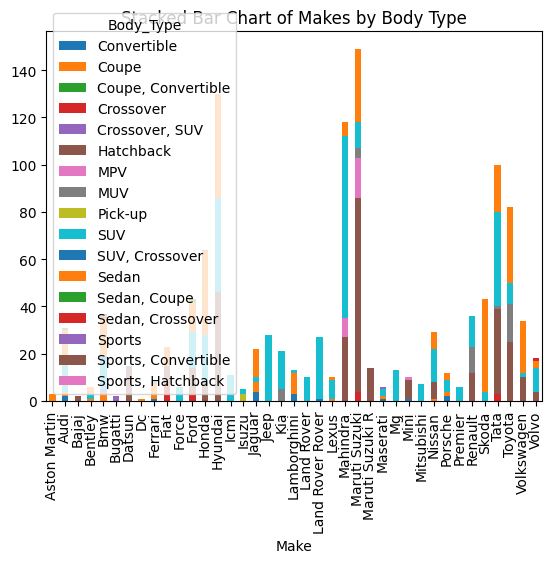

In [81]:
df.groupby(['Make', 'Body_Type']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Makes by Body Type')
plt.show()
